<h1><center>Assignment 8: FRUIT CLASSIFICATION REPORT (CNN)</center></h1>

# I. Introduction 

Apply Deep Learning CNN and utilize this dataset to predict kind of fruit as the given

# II. Data source

https://www.kaggle.com/moltean/fruits

# III. Data description

Total number of images: 82213.

Training set size: 61488 images (one fruit or vegetable per image).

Test set size: 20622 images (one fruit or vegetable per image).

Multi-fruits set size: 103 images (more than one fruit (or fruit class) per image)

Number of classes: 120 (fruits and vegetables).

Image size: 100x100 pixels.

# IV.  TRAINING

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist, fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


## 1. Define input data before training

In [2]:
# setting image size, batch size, number of classes
img_width, img_height = 100, 100
batch_size = 32
num_classes = 120

# getting directory of 'Training', 'Test', 'test-multiple_fruits' folders
train_data_dir = 'D:/ML/ML CBD/data set/fruits-360_dataset/fruits-360/Training'
test_data_dir = 'D:/ML/ML CBD/data set/fruits-360_dataset/fruits-360/Test'
multi_test_dir = 'D:/ML/ML CBD/data set/fruits-360_dataset/fruits-360/test-multiple_fruits'


## 2. Define CNN model

#### Model structure: (CONV2D (relu) -> MAX POOLING) x 3 -> FULLY CONNECTED (hidden layer - 64 units -> final layer - 120 units -> softmax)  

In [3]:
def create_model(height, width, depth, num_classes, final_activation="softmax"):
    
    model = Sequential()
    input_shape = (height, width, depth)
    chanDim = -1

    # if we are using "channels first", update the input shape
    if K.image_data_format() == "channels_first":
        inputShape = (depth, height, width)
        chanDim = 1
    
    # CONV -> RELU => POOL
    model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # (CONV -> RELU) x 2 => POOL
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # (CONV -> RELU) x 2 => POOL
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # FC
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # softmax classifier
    model.add(Dense(num_classes, activation='relu'))

    # return the constructed network architecture
    return model

#### Hyper parameter tuning, model compiling

In [4]:
model = create_model(100, 100, 3, 120, 'softmax')

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

In [5]:
model1 = keras.models.load_model('softmax.h5')

In [6]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 98, 98, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 47, 47, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)       

## 3. Generate image inputs

In [7]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

multi_test_datagen = ImageDataGenerator(rescale=1./255)

## train
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode="rgb",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode= 'categorical')

## test
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    color_mode="rgb",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode= 'categorical',
    shuffle=False)

## multi_test
multi_test_generator = test_datagen.flow_from_directory(
    multi_test_dir,
    color_mode="rgb",
    target_size=(img_width, img_height),
    class_mode= None,
    shuffle=False)

step_train_size = train_generator.n // train_generator.batch_size
step_test_size = test_generator.n // test_generator.batch_size

Found 60498 images belonging to 120 classes.
Found 20622 images belonging to 120 classes.
Found 106 images belonging to 1 classes.


## 4. Training model

#### epoch steps of train and test set

In [8]:
# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch= step_train_size ,
#     epochs=8,
#     validation_data=test_generator,
#     validation_steps= step_test_size)

# model.save('multi_test.h5')

Epoch 1/8
1890/1890 [==============================] - 164s 87ms/step - loss: 0.0024 - acc: 0.9993 - val_loss: 0.0037 - val_acc: 0.9989

Epoch 2/8
1890/1890 [==============================] - 165s 87ms/step - loss: 0.0013 - acc: 0.9996 - val_loss: 0.0035 - val_acc: 0.9989

Epoch 3/8
1890/1890 [==============================] - 164s 87ms/step - loss: 9.8979e-04 - acc: 0.9997 - val_loss: 0.0016 - val_acc: 0.9996

Epoch 4/8
1890/1890 [==============================] - 164s 87ms/step - loss: 7.4033e-04 - acc: 0.9998 - val_loss: 0.0029 - val_acc: 0.9994

Epoch 5/8
1890/1890 [==============================] - 164s 87ms/step - loss: 4.7262e-04 - acc: 0.9998 - val_loss: 0.0019 - val_acc: 0.9995

Epoch 6/8
1890/1890 [==============================] - 164s 87ms/step - loss: 3.6703e-04 - acc: 0.9999 - val_loss: 0.0018 - val_acc: 0.9996

Epoch 7/8
1890/1890 [==============================] - 164s 87ms/step - loss: 3.2713e-04 - acc: 0.9999 - val_loss: 0.0014 - val_acc: 0.9997

Epoch 8/8
1890/1890 [==============================] - 164s 87ms/step - loss: 2.7447e-04 - acc: 0.9999 - val_loss: 0.0034 - val_acc: 0.9992

## 5. Evaluate model

#save history loggs
https://stackoverflow.com/questions/47843265/how-can-i-get-the-a-keras-models-history-after-loading-it-from-a-file-in-python

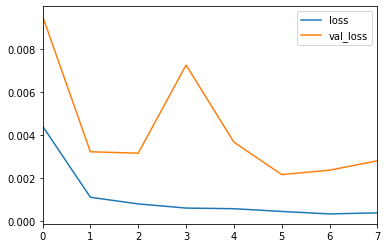

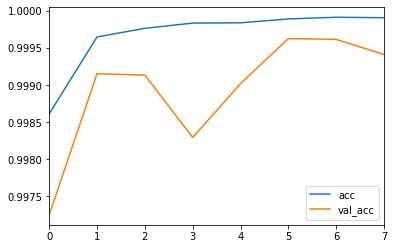

In [9]:
import pandas as pd
score_test = pd.read_csv('training.log', sep=',', engine='python')

score_test[['loss','val_loss']].plot()
score_test[['acc', 'val_acc']].plot()

plt.show()

### 5.1 Evaluation on 'Test' set 

In [10]:
# all 120 labels
class_names = list(train_generator.class_indices.keys())

#### f1-score, precision, recall

In [11]:
predict_test = model1.predict_generator(test_generator)

In [12]:
predict_test_labels = np.argmax(predict_test, axis=1)
actual_test_labels = test_generator.classes

In [13]:
from sklearn.metrics import classification_report

report = classification_report(actual_test_labels, predict_test_labels, target_names=class_names)
print(report)

                     precision    recall  f1-score   support

     Apple Braeburn       1.00      0.69      0.82       164
 Apple Crimson Snow       1.00      0.91      0.95       148
     Apple Golden 1       1.00      0.88      0.94       164
     Apple Golden 2       0.91      1.00      0.95       164
     Apple Golden 3       0.71      1.00      0.83       161
 Apple Granny Smith       1.00      0.66      0.80       164
    Apple Pink Lady       0.92      1.00      0.96       152
        Apple Red 1       1.00      0.92      0.96       164
        Apple Red 2       0.80      1.00      0.89       164
        Apple Red 3       0.97      1.00      0.98       144
Apple Red Delicious       0.98      1.00      0.99       166
 Apple Red Yellow 1       0.99      1.00      1.00       164
 Apple Red Yellow 2       1.00      1.00      1.00       219
            Apricot       1.00      1.00      1.00       164
            Avocado       1.00      1.00      1.00       143
       Avocado ripe    

#### predict random images outside Test set

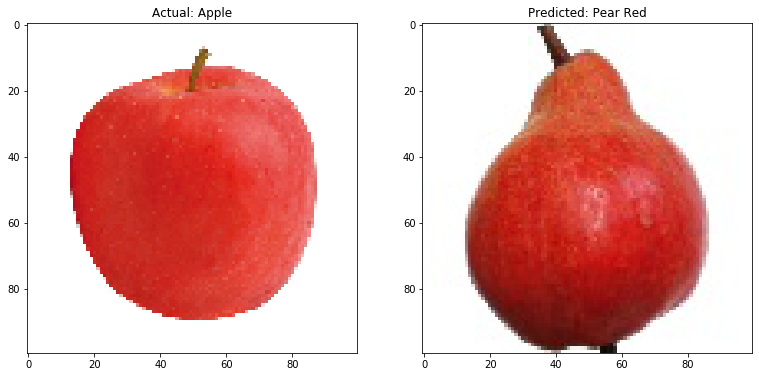

In [14]:
apple = load_img('D:/ML/ML CBD/data set/fruits-360_dataset/fruits-360/apple.jpg', target_size=(100, 100))
apple_image = img_to_array(apple)/255
apple_image = np.expand_dims(apple_image, axis=0)

apple_image_predict = model1.predict_classes(apple_image)

plt.figure(figsize=(13,7))
plt.subplot(121)
plt.title(f'Actual: Apple')
plt.imshow(apple)

plt.subplot(122)
plt.title(f'Predicted: {class_names[apple_image_predict[0]]}')
plt.imshow(load_img('D:/ML/ML CBD/data set/fruits-360_dataset/fruits-360/Training/Pear Red/0_100.jpg', target_size=(100, 100)))
plt.show()

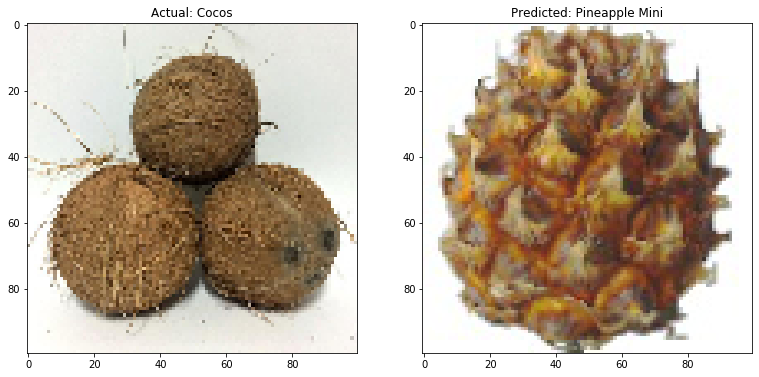

In [15]:
apple = load_img('D:/ML/ML CBD/data set/fruits-360_dataset/fruits-360/cocos.jpg', target_size=(100, 100))
apple_image = img_to_array(apple)/255
apple_image = np.expand_dims(apple_image, axis=0)

apple_image_predict = model1.predict_classes(apple_image)

plt.figure(figsize=(13,7))
plt.subplot(121)
plt.title(f'Actual: Cocos')
plt.imshow(apple)

plt.subplot(122)
plt.title(f'Predicted: {class_names[apple_image_predict[0]]}')
plt.imshow(load_img(f'D:/ML/ML CBD/data set/fruits-360_dataset/fruits-360/Training/Pineapple Mini/15_100.jpg', target_size=(100, 100)))
plt.show()

### 5.2 Evaluation on 'multi-test-sets' 

#### The multi-test-sets has 106 images

In [16]:
multi_test_generator.n

106

In [17]:
model2 = create_model(100, 100, 3, 120, 'sigmoid')

model2.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

model2 = keras.models.load_model('sigmoid.h5')

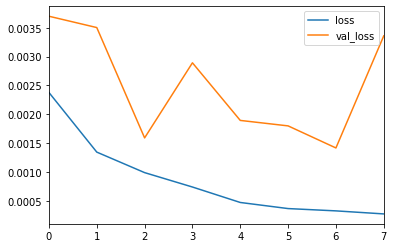

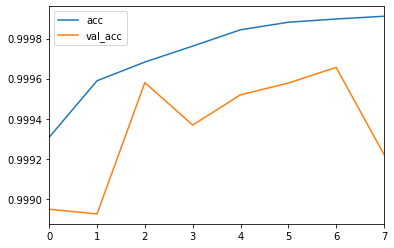

In [18]:
score_multi_test = pd.read_csv('multi_test.log', sep=',', engine='python')

score_multi_test[['loss','val_loss']].plot()
score_multi_test[['acc', 'val_acc']].plot()

plt.show()

In [19]:
multi_predict = model2.predict_generator(multi_test_generator)

In [20]:
#set threshold > 0.5
multi_labels = np.where(multi_predict > 0.5, 1, 0)

image = []
for i in range(106):
    #get index of labels
    img_index = np.where(multi_labels[i] == 1)
    #store the index 
    image.append(img_index) 
    
image = np.asarray(image)

filename = multi_test_generator.filenames

# get the list of labels of multi_test images
fruit_multi_test_name = []
for name in filename:
    name=name.replace('test-multiple_fruits\\', '')
    name = name.replace('.jpg', '')
    fruit_multi_test_name.append(name)

for i in range(106):    
    class_index = image[i][0]
    print(f'Actual: {fruit_multi_test_name[i]}')
    print('\t ----')
    for j in class_index:
        label = class_names[j]
        print(f'Predicted: {label}')
    
    print('=================================')

Actual: Bananas(lady_finger)1
	 ----
Actual: Bananas(lady_finger)2
	 ----
Actual: Bananas(lady_finger)3
	 ----
Actual: Bananas(lady_finger)4
	 ----
Actual: Bananas(lady_finger)5
	 ----
Actual: apple
	 ----
Predicted: Pepper Green
Actual: apple_apricot_nectarine_peach_peach(flat)_pomegranate_pear_plum
	 ----
Actual: apple_apricot_peach_peach(flat)_pomegranate_pear_plum
	 ----
Actual: apple_apricot_peach_peach(flat)_pomegranate_pear_plum_2
	 ----
Actual: apple_apricot_peach_peach(flat)_pomegranate_pear_plum_3
	 ----
Actual: apple_grape
	 ----
Actual: apple_grape2
	 ----
Actual: apple_pear
	 ----
Actual: apples1
	 ----
Predicted: Cauliflower
Actual: apples2
	 ----
Predicted: Quince
Actual: apples3
	 ----
Actual: apples4
	 ----
Actual: apples_peaches1
	 ----
Actual: apples_peaches2
	 ----
Actual: apples_pears
	 ----
Predicted: Cauliflower
Predicted: Quince
Actual: cactus fruits
	 ----
Actual: cherries(rainier)1
	 ----
Actual: cherries(rainier)2
	 ----
Actual: cherries
	 ----
Predicted: Cau

# V. Conclusion

=> the model does not predict well on the 'multi-test-sets' since there are to much noise regarding various colors and edges in the these images